In [1]:
import h5py
import matplotlib.pyplot as plt

## HDF5 File

In [2]:
f = h5py.File('../data/step4_0.h5', 'r')
f.keys()

<KeysViewHDF5 ['chamber']>

In [3]:
f['chamber']

<HDF5 dataset "chamber": shape (35430,), type "|V144">

In [4]:
f['chamber'].dtype.names

('layer', 'ieta', 'strip', 'label', 'bx', 'cls', 'pt', 'eta', 'phi')

In [5]:
strip = f['chamber'][13]['strip']
ieta = f['chamber'][13]['ieta']
layer = f['chamber'][13]['layer']
label = f['chamber'][13]['label']

ieta, layer, strip, label

(array([1, 2, 4, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 1, 4, 6, 6, 6, 6, 6, 7,
        7, 7, 7, 7, 7, 1, 1, 1, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 0, 1,
        1, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7,
        1, 1, 3, 4, 5, 6, 6, 6, 6, 7, 7, 7, 7, 1, 2, 4, 5, 6, 6, 6, 6, 7,
        7, 7, 7, 7, 7], dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5], dtype=int32),
 array([301, 112, 356, 115, 103, 313,  32, 155,  98, 239, 166, 118, 160,
        135, 301, 363, 135,  98,  73, 301, 110, 108, 243, 170, 170, 122,
        109, 313, 234, 301, 300, 146, 141,  18,  91, 295,  58, 253, 117,
        247,  81, 109, 109, 124, 301,  63,  60, 241,   7, 145,  84, 145,
        106, 301,  24, 127, 119,  86, 13

In [6]:
print(f"number of rechits: {len(label)}")

number of rechits: 93


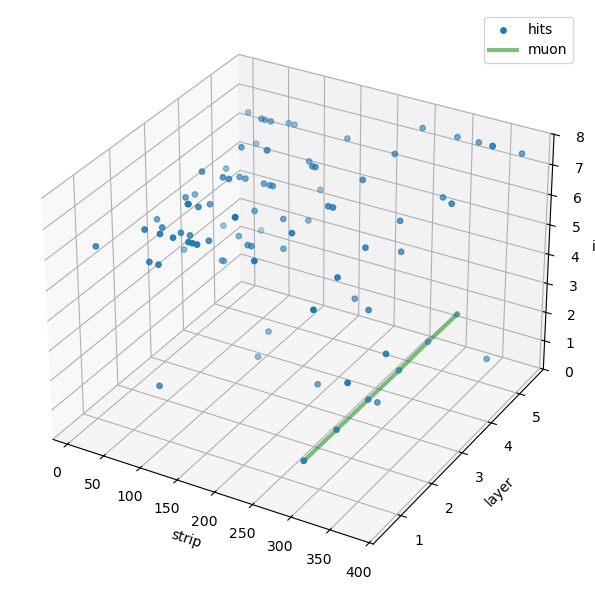

In [7]:
fig,ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'3d'})

ax.scatter(strip, layer+0.5, ieta+0.5, s=15, marker='o', label='hits')
ax.plot(strip[label==1], layer[label==1]+0.5, ieta[label==1]+0.5, 
        linewidth=3, color='g', alpha=0.5, label='muon')

ax.set_xlabel('strip')
ax.set_ylabel('layer')
ax.set_zlabel('ieta')

ax.legend()
fig.tight_layout()

## ME0DigiImageDataset (for ME0SegCNN3d model)

In [8]:
from me0.data.datasets.image import ME0DigiImageDataset

dataset = ME0DigiImageDataset(
    file='../data/step4_0.h5',
    features={
        'cls': {'min': 1, 'max': 384},
        'bx': {'min': -3, 'max': 3},
    },
    get_central_bx=True,
)

dataset[0]

processing 35430 events: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.05s/it]


TensorDict(
    fields={
        data_mask: Tensor(shape=torch.Size([8, 6, 384]), device=cpu, dtype=torch.bool, is_shared=False),
        eta: Tensor(shape=torch.Size([0]), device=cpu, dtype=torch.float32, is_shared=False),
        input: Tensor(shape=torch.Size([3, 8, 6, 384]), device=cpu, dtype=torch.float32, is_shared=False),
        phi: Tensor(shape=torch.Size([0]), device=cpu, dtype=torch.float32, is_shared=False),
        pt: Tensor(shape=torch.Size([0]), device=cpu, dtype=torch.float32, is_shared=False),
        target: Tensor(shape=torch.Size([8, 6, 384]), device=cpu, dtype=torch.int32, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)

In [9]:
hitmap = dataset[13]['input'][0]
mask = dataset[13]['data_mask']

hitmap[mask]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.])

In [10]:
ieta, layer, strip = mask.nonzero(as_tuple=True)
label = dataset[13]['target'][mask]
ieta, layer, strip, label

(tensor([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
         4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]),
 tensor([3, 0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 0, 5, 3, 3, 3, 3, 4, 0, 1, 2, 3, 3, 4,
         5, 2, 2, 2, 3, 3, 3, 3, 4, 5, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3,
         3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]),
 tensor([109, 301, 301, 234, 301, 313, 124, 301, 300, 378, 300, 112,  26,   7,
          60,  63, 241,  17, 356, 363, 300,  84, 145, 136, 110,  18, 141, 146,
          24, 106, 145, 301,  22,  20,  32, 103, 115, 313,  73,  98, 110, 135,
         301,  58,  91, 295,  86,  94, 119, 127, 131, 299,  79,  80, 137, 315,
           9,  66,  74, 147,  98, 118, 135, 155, 160, 166, 239

In [11]:
print(f"number of rechits: {len(label)}")

number of rechits: 91


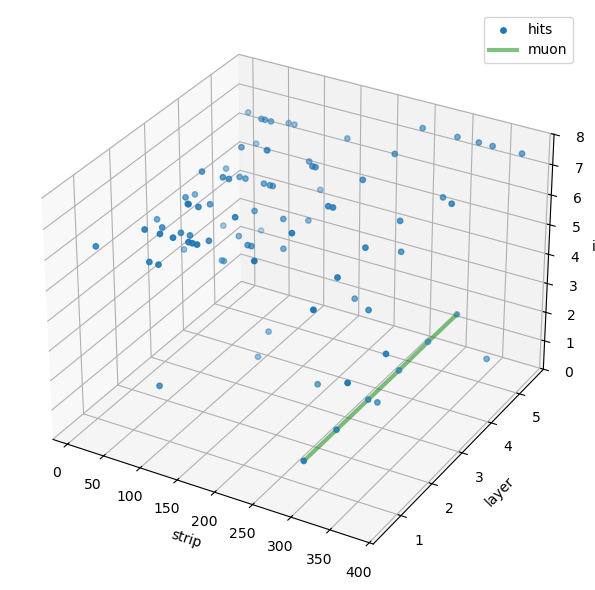

In [12]:
fig,ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'3d'})

ax.scatter(strip, layer+0.5, ieta+0.5, s=15, marker='o', label='hits')
ax.plot(strip[label==1], layer[label==1]+0.5, ieta[label==1]+0.5, 
        linewidth=3, color='g', alpha=0.5, label='muon')

ax.set_xlabel('strip')
ax.set_ylabel('layer')
ax.set_zlabel('ieta')

ax.legend()
fig.tight_layout()

## ME0IndexDataset (for ME0Transformer model)

In [13]:
from me0.data.datasets.index import ME0IndexDataset

dataset = ME0IndexDataset(
    file='../data/step4_0.h5',
    features={
        'cls': {'min': 1, 'max': 384},
        'bx': {'min': -3, 'max': 3},
    },
)

dataset[0]

processing 35430 events:   0%|                                                                                                                           | 1/35430 [00:01<18:24:39,  1.87s/it]


TensorDict(
    fields={
        eta: Tensor(shape=torch.Size([0]), device=cpu, dtype=torch.float32, is_shared=False),
        indices: Tensor(shape=torch.Size([65, 3]), device=cpu, dtype=torch.int32, is_shared=False),
        input: Tensor(shape=torch.Size([65, 5]), device=cpu, dtype=torch.float32, is_shared=False),
        phi: Tensor(shape=torch.Size([0]), device=cpu, dtype=torch.float32, is_shared=False),
        pt: Tensor(shape=torch.Size([0]), device=cpu, dtype=torch.float32, is_shared=False),
        target: Tensor(shape=torch.Size([65]), device=cpu, dtype=torch.int32, is_shared=False)},
    batch_size=torch.Size([]),
    device=None,
    is_shared=False)

In [14]:
ieta, layer, strip = dataset[13]['indices'].T
label = dataset[13]['target']

ieta, layer, strip, label

(tensor([1, 2, 4, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 1, 4, 6, 6, 6, 6, 6, 7, 7, 7,
         7, 7, 7, 1, 1, 1, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 0, 1, 1, 3, 3, 3,
         3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 1, 1, 3, 4, 5, 6,
         6, 6, 6, 7, 7, 7, 7, 1, 2, 4, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7],
        dtype=torch.int32),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        dtype=torch.int32),
 tensor([301, 112, 356, 115, 103, 313,  32, 155,  98, 239, 166, 118, 160, 135,
         301, 363, 135,  98,  73, 301, 110, 108, 243, 170, 170, 122, 109, 313,
         234, 301, 300, 146, 141,  18,  91, 295,  58, 253, 117, 247,  81, 109,
         109, 124, 301,  63,  60, 241,   7, 145,  84, 145, 106, 301,  24, 1

In [15]:
print(f"number of rechits: {len(label)}")

number of rechits: 93


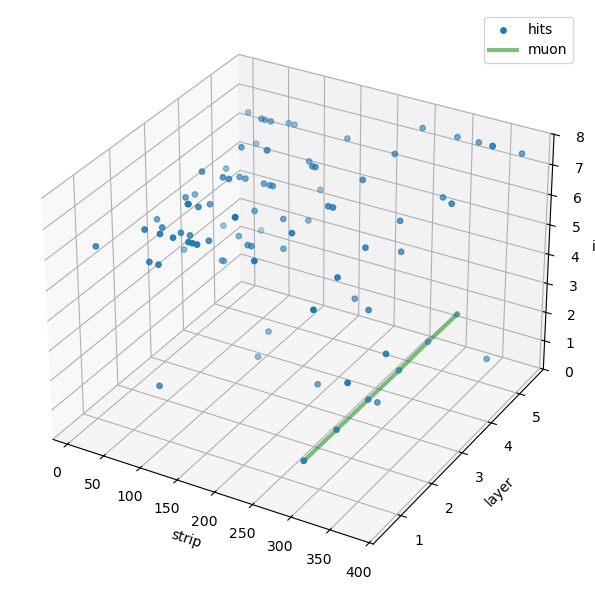

In [16]:
fig,ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'3d'})

ax.scatter(strip, layer+0.5, ieta+0.5, s=15, marker='o', label='hits')
ax.plot(strip[label==1], layer[label==1]+0.5, ieta[label==1]+0.5, 
        linewidth=3, color='g', alpha=0.5, label='muon')

ax.set_xlabel('strip')
ax.set_ylabel('layer')
ax.set_zlabel('ieta')

ax.legend()
fig.tight_layout()